In [1]:
import pandas as pd

# Load the datasets
datatraining = pd.read_csv('datatraining.csv')
datatest = pd.read_csv('datatest.csv')
datatest2 = pd.read_csv('datatest2.csv')

df = pd.concat([datatraining, datatest, datatest2], ignore_index=True)
df.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [2]:
df.shape

(20560, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


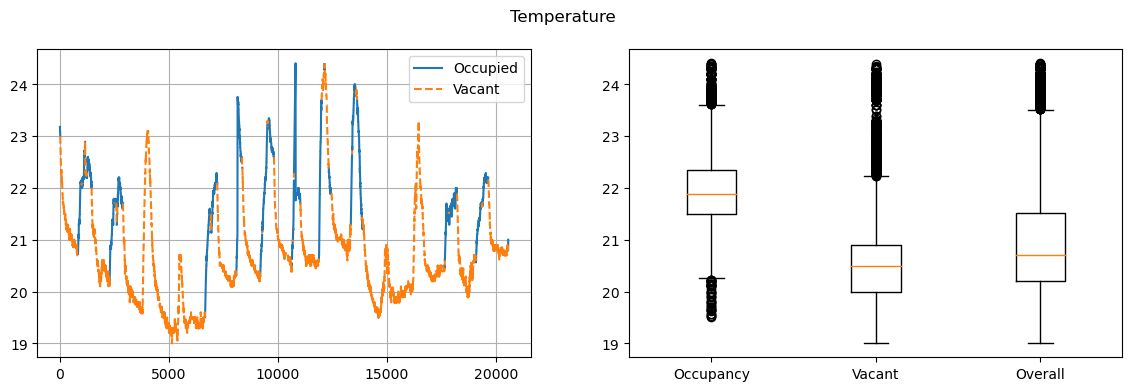

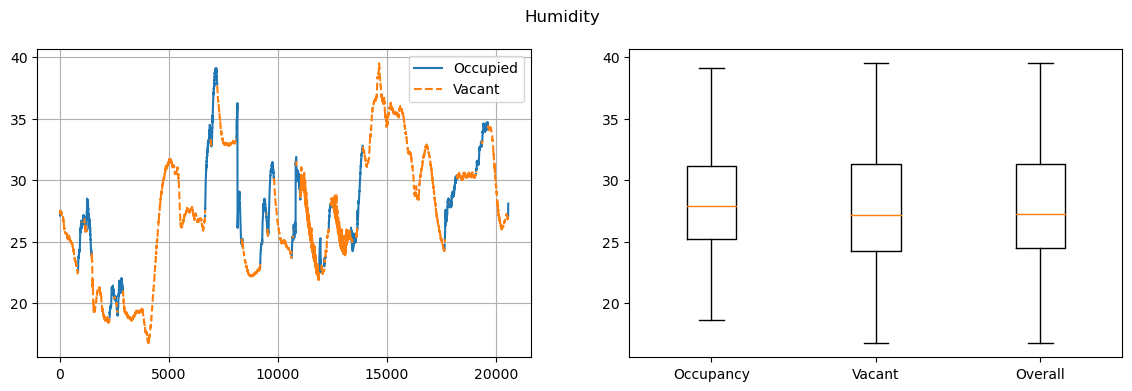

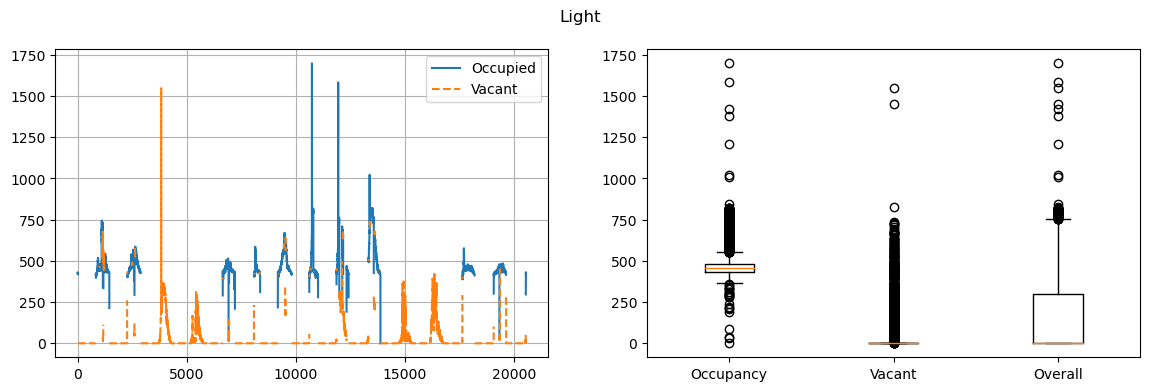

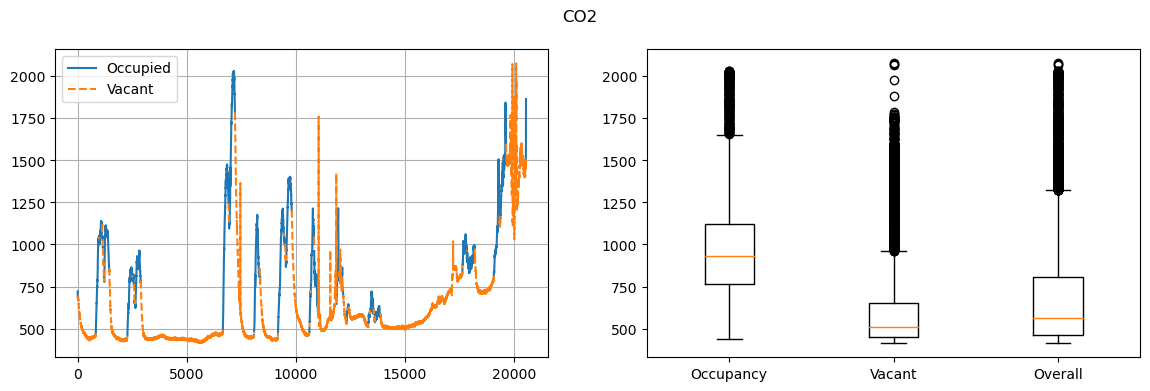

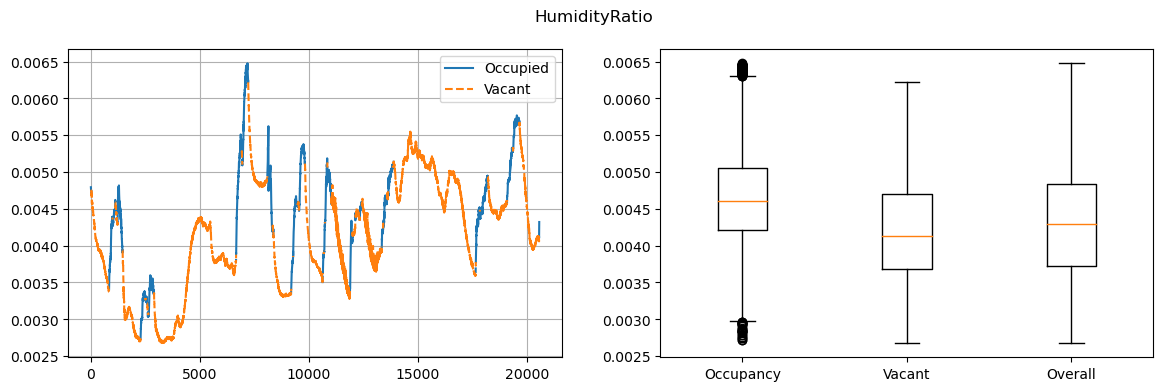

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def occupancy_plot(df, cat):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    
    fig.suptitle(cat)
    ax1.plot(np.where(df.Occupancy==1, df[cat], None), label='Occupied')
    ax1.plot(np.where(df.Occupancy==0, df[cat], None), label='Vacant', ls='--')
    ax1.grid()
    ax1.legend()
    
    ax2.boxplot([df[cat][df.Occupancy==1], df[cat][df.Occupancy==0], df[cat]])
    ax2.set_xticklabels(['Occupancy', 'Vacant', 'Overall'])

for i in range(1, 6):
    occupancy_plot(df, df.columns[i])

In [6]:
df2 = df
df2 = df2[np.abs(df2.Temperature - df2.Temperature.mean()) <= 3*df2.Temperature.std()]
print("1. Removing the Outliers on 'Temperature' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")
df = df2[np.abs(df2.Light - df2.Light.mean()) <= 3*df2.Light.std()]
print("2. Removing the Outliers on 'Light' has reduced the data size from {} to {}.".format(len(df2), len(df)))
print("\n")
df2 = df[np.abs(df.CO2 - df.CO2.mean()) <= 3*df2.CO2.std()]
print("3. Removing the Outliers on 'CO2' has reduced the data size from {} to {}.".format(len(df), len(df2)))
print("\n")

1. Removing the Outliers on 'Temperature' has reduced the data size from 20560 to 20417.


2. Removing the Outliers on 'Light' has reduced the data size from 20417 to 20261.


3. Removing the Outliers on 'CO2' has reduced the data size from 20261 to 19991.




In [7]:
df2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000
mean,20.848690,27.584285,120.591132,673.960672,0.004201,0.216948
std,0.995753,4.910707,199.095897,284.069642,0.000747,0.412177
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.166667,24.500000,0.000000,458.500000,0.003713,0.000000
50%,20.700000,27.290000,0.000000,559.250000,0.004273,0.000000
75%,21.463333,31.200000,225.250000,796.125000,0.004819,0.000000
max,24.066667,39.500000,756.000000,1625.000000,0.005978,1.000000


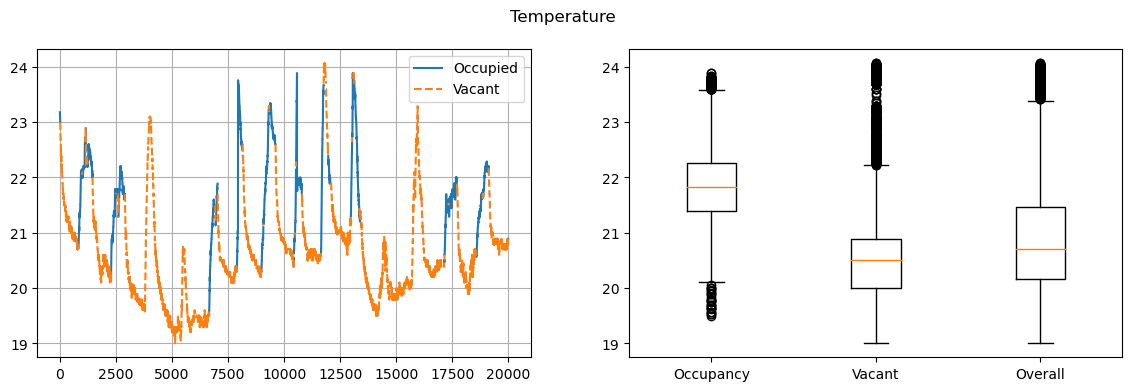

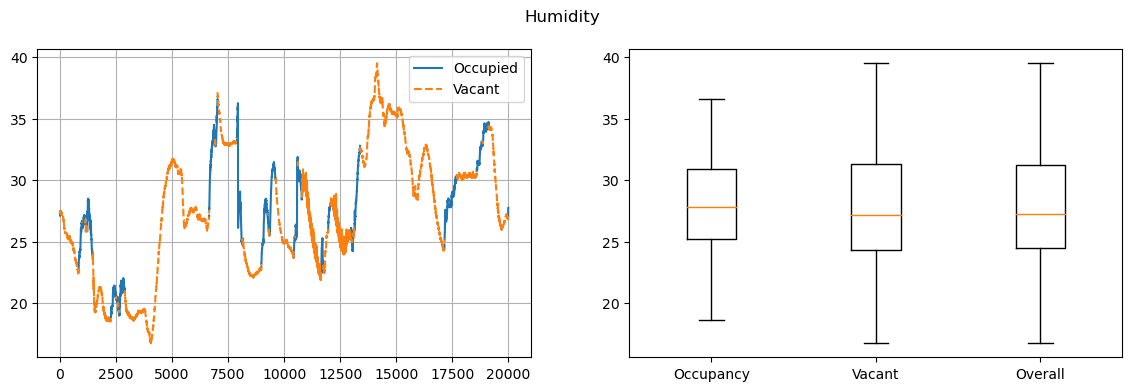

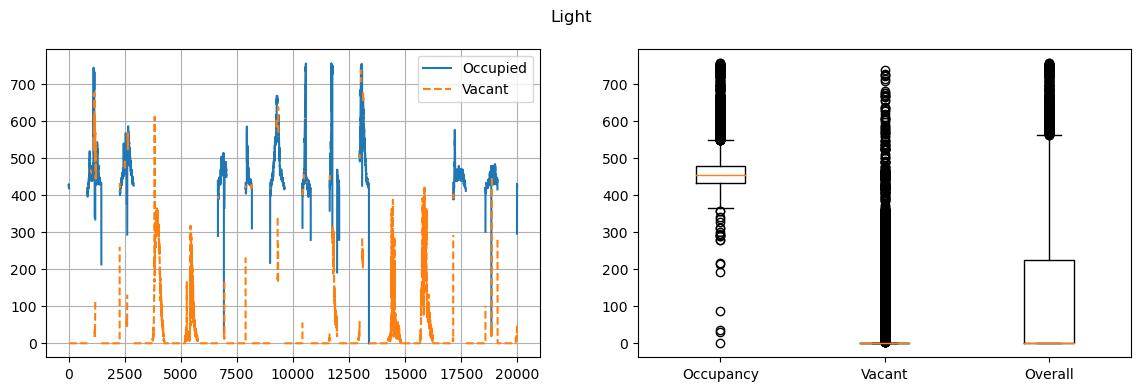

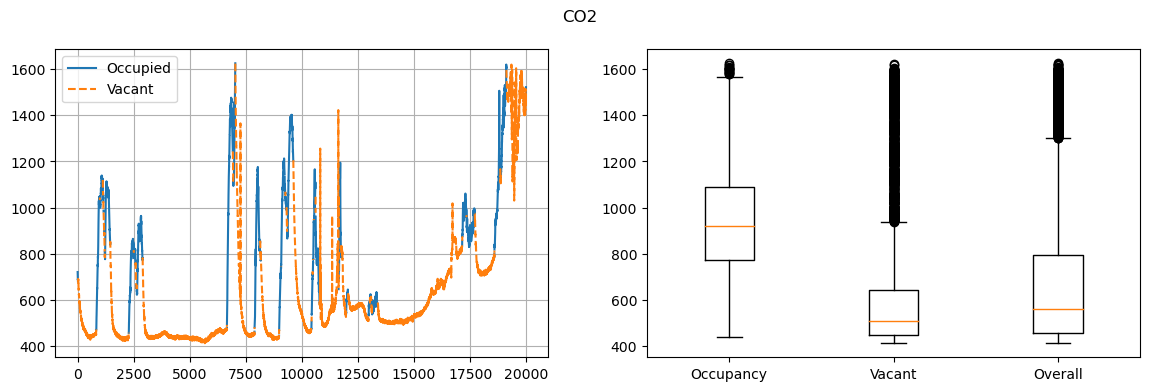

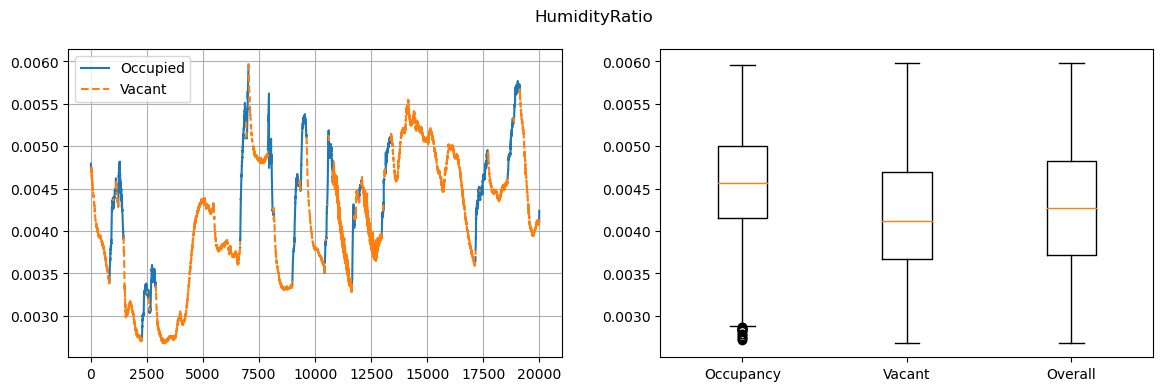

In [8]:
for i in range(1, 6):
    occupancy_plot(df2, df2.columns[i])

C:\Users\Shaheer Ahmed Khan\AppData\Local\Temp\ipykernel_34700\3175795306.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df2.corr()))
C:\Users\Shaheer Ahmed Khan\AppData\Local\Temp\ipykernel_34700\3175795306.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True, fmt="1.2f", mask=mask, cmap="YlGnBu")


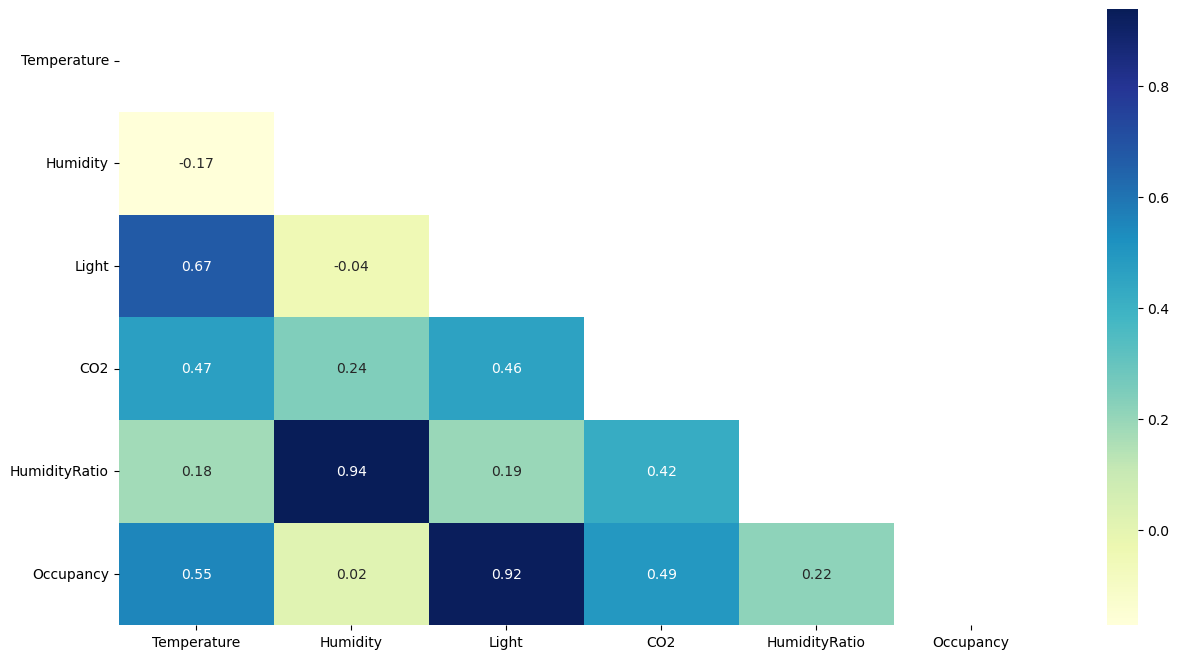

In [9]:
import seaborn as sns

mask = np.triu(np.ones_like(df2.corr()))
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(),annot=True, fmt="1.2f", mask=mask, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X, Y = df2.iloc[:,1:-1], df2.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Create a dataframe that used to store data from confusion matrix and accuracy 
result = pd.DataFrame(columns=['Classifier','True Negative', 'False Postive', 'False Negative', 'True Positive', 'Classifier Accuracy'])


def accuracy_vis(xtest, ytest, ypred, predit_proba):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    
    # Confusion Matrix Visulation
    cm = confusion_matrix(ytest, ypred)
    x_axis_labels = ['Actual Postive', 'Actual Negative']
    y_axis_labels = ['Predicted Postive', 'Predicted Negative']
    sns.heatmap(cm, fmt=".0f", annot=True, linewidths=.5, ax=ax1, 
                cmap="YlGnBu", xticklabels=x_axis_labels)
    ax1.set_yticklabels(y_axis_labels, rotation=0, ha='right')
    
    # ROC Curve Visulation
    logit_roc_auc = roc_auc_score(ytest, ypred)
    fpr, tpr, thresholds = roc_curve(ytest, predit_proba[:,1])
    ax2.plot(fpr, tpr, label='Logistic Regression (area = {})'.format(round(logit_roc_auc,6)))
    ax2.plot([0, 1], [0, 1],'r--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend()
    plt.show()
    return(confusion_matrix(Y_test, Y_pred).ravel())

Accuracy of Logistic Regression Classifier on test set: 98.939576%


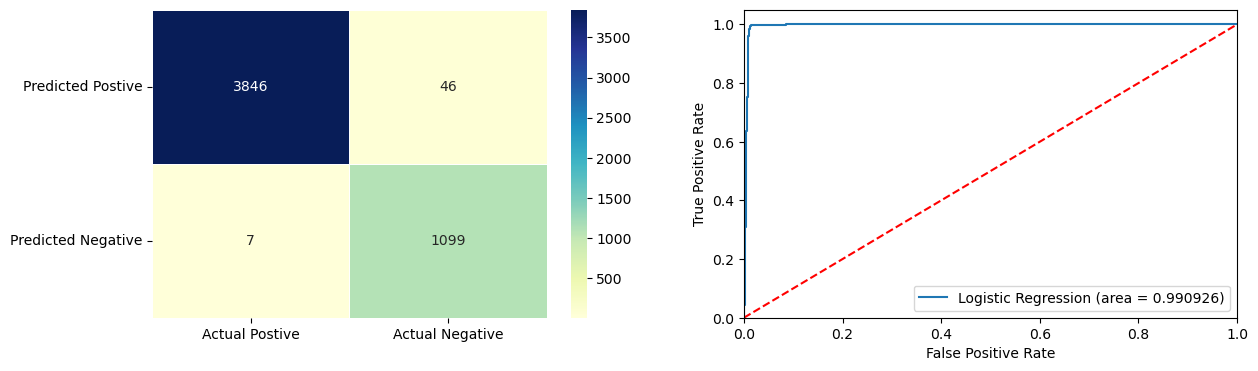

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred, lr_score, predit_proba = lr.predict(X_test), lr.score(X_test, Y_test), lr.predict_proba(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.6f}%'.format(lr_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['LR'] = ['Logistic Regression', tn, fp, fn, tp, round(lr_score*100, 6)]

Accuracy of K Nearest Neighbors Classifier on test set: 98.999600%


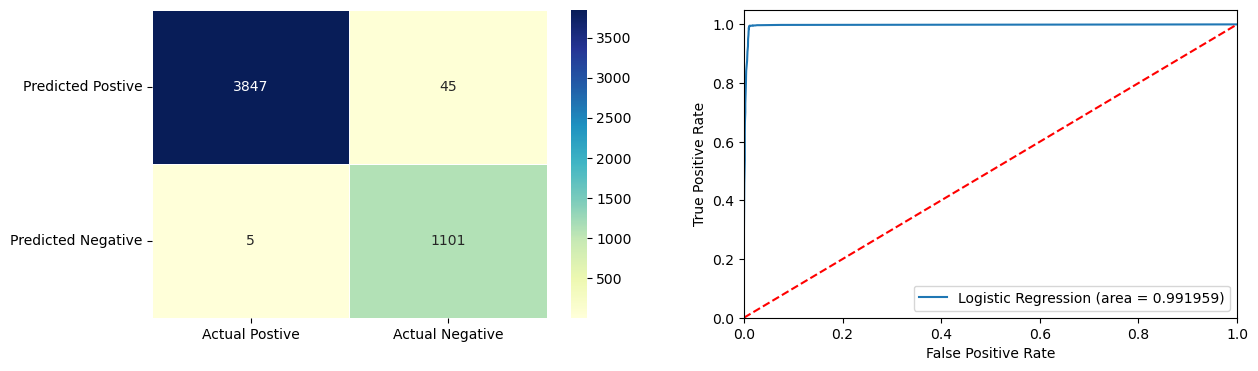

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))))
knn.fit(X_train, Y_train)
Y_pred, knn_score, predit_proba  = knn.predict(X_test), knn.score(X_test, Y_test), knn.predict_proba(X_test)
print('Accuracy of K Nearest Neighbors Classifier on test set: {:.6f}%'.format(knn_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['KNN'] = ['K Nearest Neighbors', tn, fp, fn, tp, round(knn_score*100, 6)]

Accuracy of Support Vector Machine Classifier on test set: 98.999600%


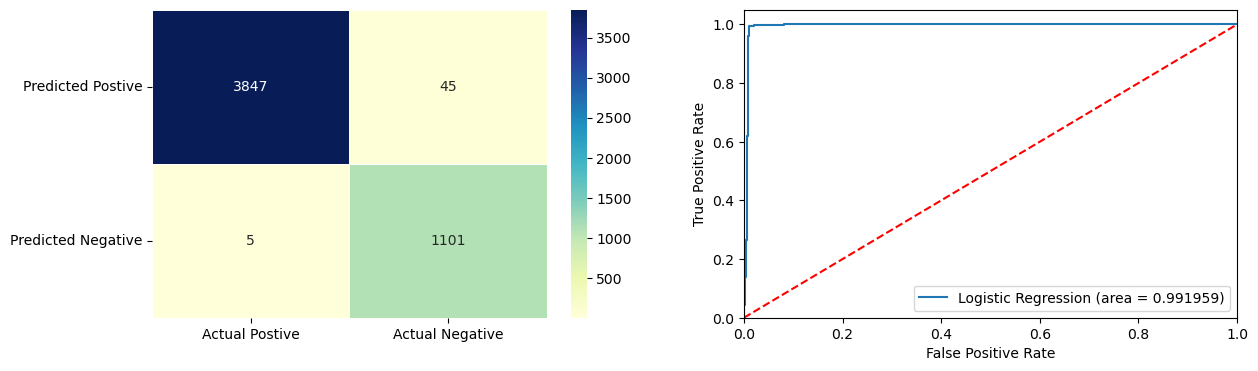

In [14]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, Y_train)
Y_pred, svm_score, predit_proba = svm.predict(X_test), svm.score(X_test, Y_test), svm.predict_proba(X_test)
print('Accuracy of Support Vector Machine Classifier on test set: {:.6f}%'.format(svm_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['SVM'] = ['Support Vector Machine', tn, fp, fn, tp, round(svm_score*100, 6)]

Accuracy of Decision Tree Classifier on test set: 99.219688%


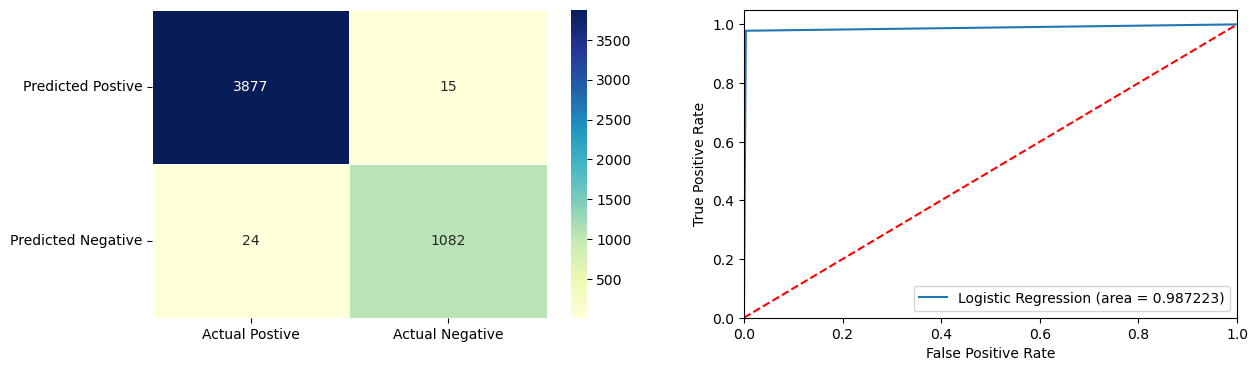

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred, dt_score, predit_proba = dt.predict(X_test), dt.score(X_test, Y_test), dt.predict_proba(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.6f}%'.format(dt_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['DT'] = ['Decision Tree', tn, fp, fn, tp, round(dt_score*100, 6)]

Accuracy of Random Forest Classifier on test set: 99.359744%


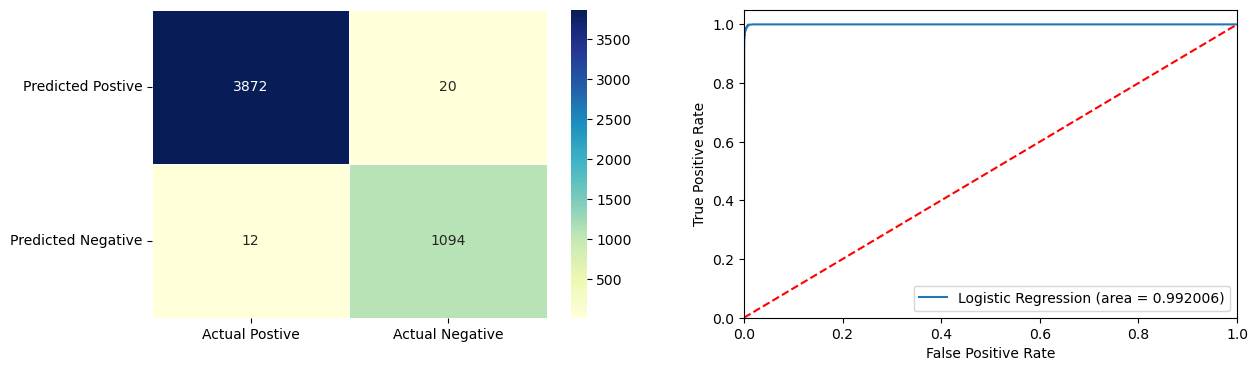

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred, rf_score, predit_proba = rf.predict(X_test), rf.score(X_test, Y_test), rf.predict_proba(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.6f}%'.format(rf_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['RF'] = ['Random Forest', tn, fp, fn, tp, round(rf_score*100, 6)]

Accuracy of Naive Bayes Classifier on test set: 97.318928%


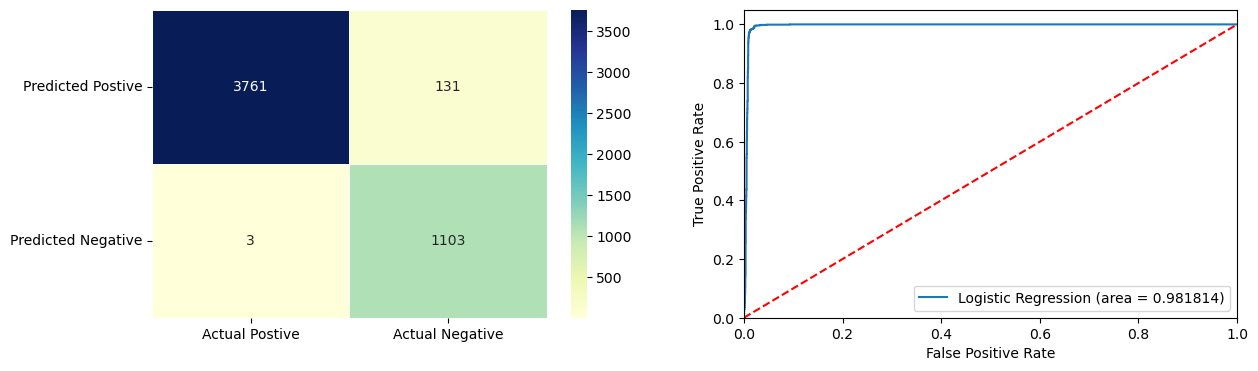

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred, nb_score, predit_proba = nb.predict(X_test), nb.score(X_test, Y_test), nb.predict_proba(X_test)
print('Accuracy of Naive Bayes Classifier on test set: {:.6f}%'.format(nb_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['NB'] = ['Naive Bayes', tn, fp, fn, tp, round(nb_score*100, 6)]

Accuracy of Gradent Boosting Classifier on test set: 99.139656%


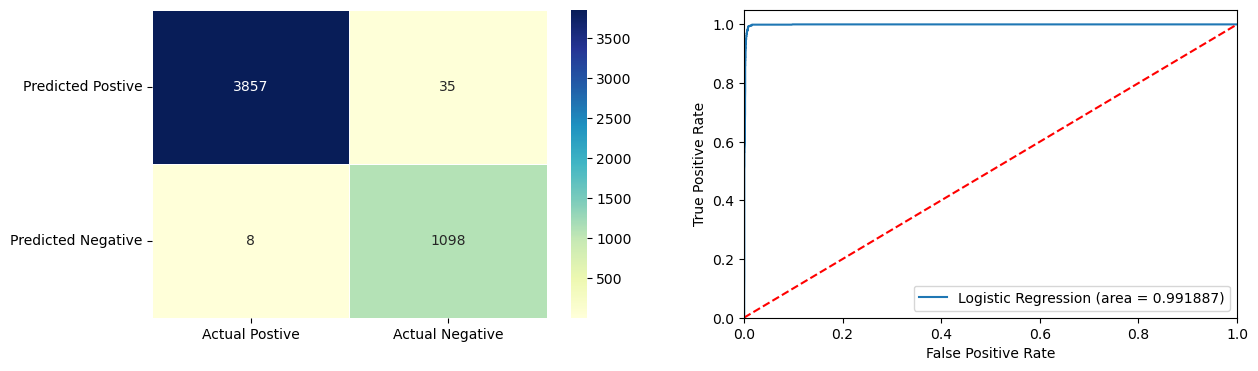

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
Y_pred, gb_score, predit_proba = gb.predict(X_test), gb.score(X_test, Y_test), gb.predict_proba(X_test)
print('Accuracy of Gradent Boosting Classifier on test set: {:.6f}%'.format(gb_score*100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred, predit_proba)
result.loc['GB'] = ['Gradent Boosting', tn, fp, fn, tp, round(gb_score*100, 6)]

In [19]:
result.sort_values('Classifier Accuracy', ascending=False)

,Classifier,True Negative,False Postive,False Negative,True Positive,Classifier Accuracy
RF,Random Forest,3872,20,12,1094,99.359744
DT,Decision Tree,3877,15,24,1082,99.219688
GB,Gradent Boosting,3857,35,8,1098,99.139656
KNN,K Nearest Neighbors,3847,45,5,1101,98.999600
SVM,Support Vector Machine,3847,45,5,1101,98.999600
LR,Logistic Regression,3846,46,7,1099,98.939576
NB,Naive Bayes,3761,131,3,1103,97.318928
